# Training YOLOv5 custom dataset with ease

Check the full explanation on medium:

https://medium.com/mlearning-ai/training-yolov5-custom-dataset-with-ease-e4f6272148ad

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile

In [ ]:
%cd ..

/content


In [ ]:
import shutil
import os, sys

zip_file = "archive.zip"

if os.path.isfile(zip_file):
  shutil.unpack_archive(zip_file, "data")
else:
  print(zip_file + " not found")

In [ ]:
import os, shutil, random

# preparing the folder structure

full_data_path = 'data/archive/'
extension_allowed = '.jpg'
split_percentage = 80

images_path = 'data/images/'
if os.path.exists(images_path):
    shutil.rmtree(images_path)
os.mkdir(images_path)

labels_path = 'data/labels/'
if os.path.exists(labels_path):
    shutil.rmtree(labels_path)
os.mkdir(labels_path)

training_images_path = images_path + 'training/'
validation_images_path = images_path + 'validation/'
training_labels_path = labels_path + 'training/'
validation_labels_path = labels_path +'validation/'

os.mkdir(training_images_path)
os.mkdir(validation_images_path)
os.mkdir(training_labels_path)
os.mkdir(validation_labels_path)

files = []

ext_len = len(extension_allowed)

for r, d, f in os.walk(full_data_path):
    for file in f:
        if file.endswith(extension_allowed):
            strip = file[0:len(file) - ext_len]
            files.append(strip)

random.shuffle(files)

size = len(files)

split = int(split_percentage * size / 100)

print("copying training data")
for i in range(split):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, training_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, training_labels_path)

print("copying validation data")
for i in range(split, size):
    strip = files[i]

    image_file = strip + extension_allowed
    src_image = full_data_path + image_file
    shutil.copy(src_image, validation_images_path)

    annotation_file = strip + '.txt'
    src_label = full_data_path + annotation_file
    shutil.copy(src_label, validation_labels_path)

print("finished")

copying training data
copying validation data
finished


In [ ]:
f = open("dataset.yaml", "a")

f.write("train: ../data/images/training/\n")
f.write("val: ../data/images/validation/\n")
f.write("nc: 53\n")
f.write("names: ['__background__', 'text', 'junction', 'crossover', 'terminal', 'gnd', 'vss', 'voltage.dc', 'voltage.ac', 'voltage.battery', 'resistor', 'resistor.adjustable', 'resistor.photo', 'capacitor.unpolarized', 'capacitor.polarized', 'inductor', 'transformer', 'diode', 'diode.light_emitting', 'diode.thyrector', 'diode.zener', 'diac', 'triac', 'thyristor', 'varistor', 'transistor.bjt', 'transistor.fet', 'transistor.photo', 'operational_amplifier', 'operational_amplifier.schmitt_trigger', 'optocoupler', 'integrated_circuit', 'integrated_circuit.ne555', 'integrated_circuit.voltage_regulator', 'xor', 'and', 'or', 'not', 'nand', 'nor', 'probe.current', 'probe.voltage', 'switch', 'relay', 'socket', 'fuse', 'speaker', 'motor', 'lamp', 'microphone', 'antenna', 'crystal', 'unknown']\n")
f.close()

In [ ]:
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 30 --data ../dataset.yaml --weights yolov5s.pt

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=../dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hs

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.4 --source ../test.jpg

detect: weights=['runs/train/exp/weights/best.pt'], source=../test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-203-g0897415 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7153066 parameters, 0 gradients, 16.2 GFLOPs
image 1/1 /content/test.jpg: 640x480 4 junctions, 1 resistor, 2 capacitor.unpolarizeds, 1 diode, 69.9ms
Speed: 0.6ms pre-process, 69.9ms inference, 181.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
from google.colab import files
files.download('/content/yolov5')

In [ ]:
!zip -r /content/file.zip /content/yolov5

In [ ]:
from google.colab import files
files.download("/content/file.zip")

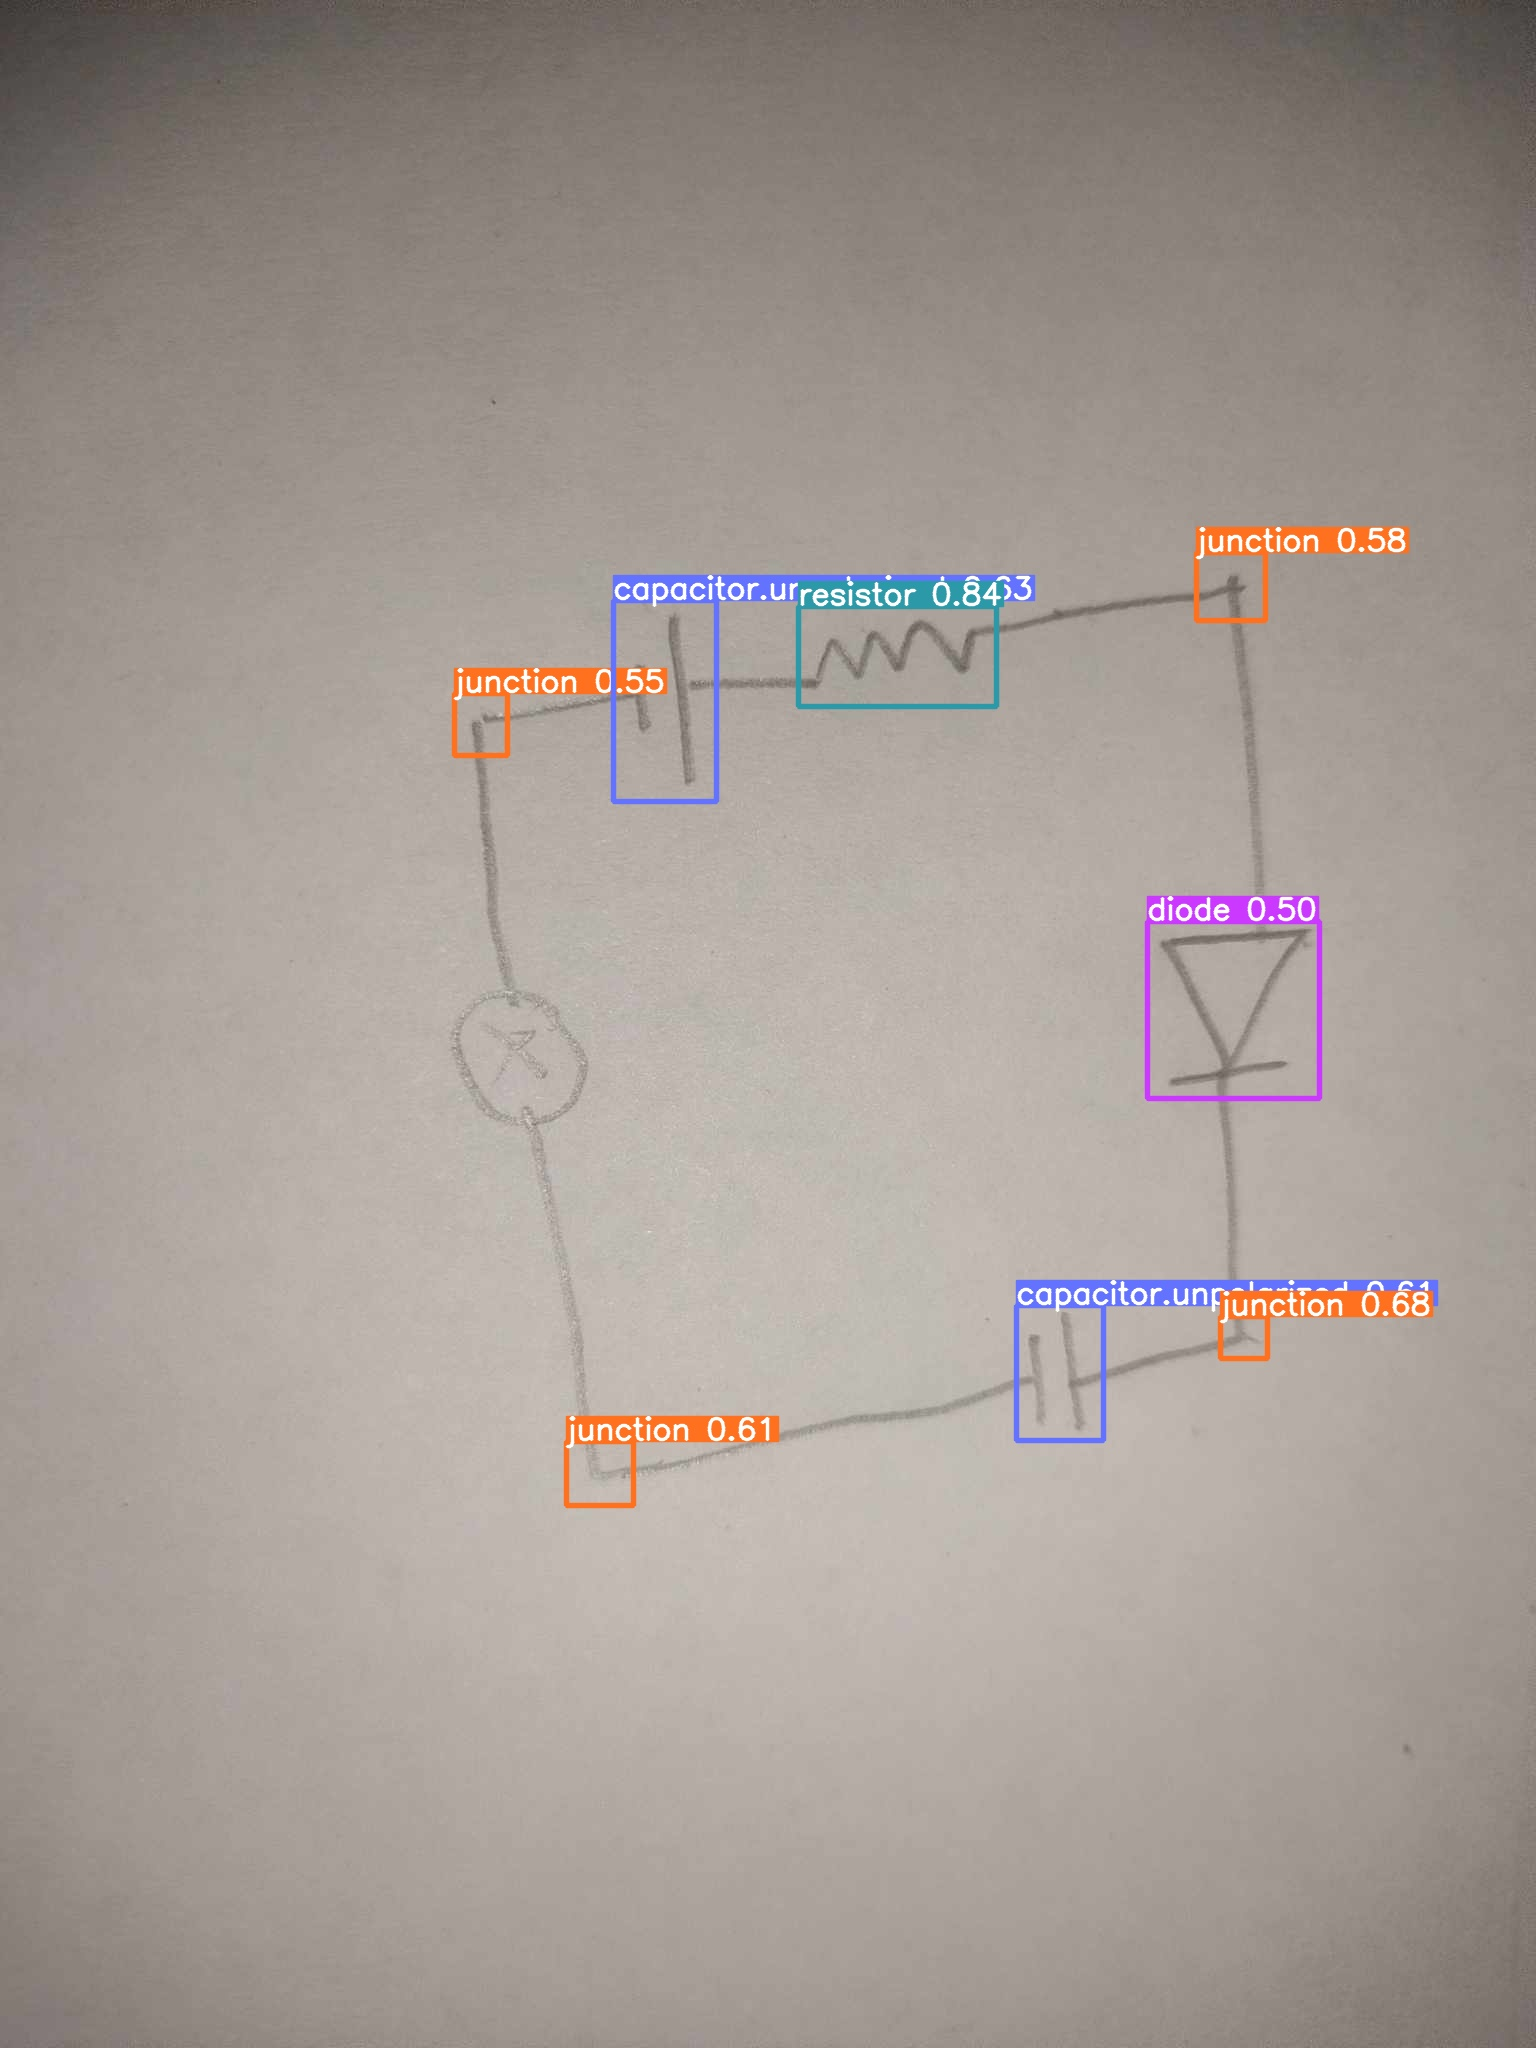

In [ ]:
from IPython.display import display
from PIL import Image

image_path = "runs/detect/exp/test.jpg"
display(Image.open(image_path))

You can download the source original images from the author site at who retain the rights on the image: https://www.pexels.com/photo/a-group-of-skaters-with-their-skateboards-on-the-sidewalk-6337382/